In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

import warnings 
warnings.filterwarnings('ignore')


In [417]:
df = pd.read_csv(r"G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\bacteria_train.csv")
df.head()

,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745


In [418]:
X = df[["Spreading_factor"]].values
y = df["Perc_population"].values

In [419]:
maxdeg = 8
x_poly = PolynomialFeatures(maxdeg).fit_transform(X)

In [420]:
alpha_list = np.linspace(10,120,1000)
len(alpha_list)
coeff_list = []

### Ridge Regularization

In [421]:
# for i in alpha_list:
#     ridge_reg = Ridge(alpha=i, normalize=True)
#     ridge_reg.fit(x_poly,y)
#     coeff_list.append(ridge_reg.coef_)

# ridge_trend = np.array(coeff_list).T
    

In [422]:
for i in alpha_list:
    ridge_reg = Pipeline([('scaler',StandardScaler()),('ridge',Ridge())])
    ridge_reg.set_params(scaler__with_mean=False,ridge__alpha = i)
    ridge_reg.fit(x_poly,y)
    coeff_list.append(ridge_reg[1].coef_)

ridge_trend = np.array(coeff_list).T

Text(0.5, 0.98, 'Ridge ($L_2$) Regression')

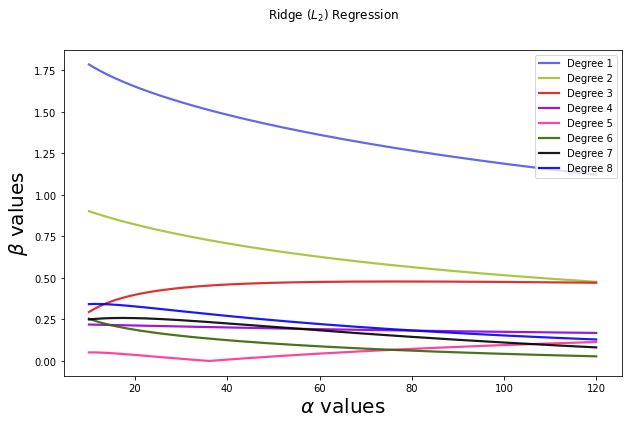

In [423]:
colors = ['#5059E8','#9FC131FF','#D91C1C','#9400D3','#FF2F92','#336600','black','blue']
fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    ax.plot(alpha_list,np.abs(ridge_trend[i+1]), color=colors[i], alpha=0.9, label = f'Degree {i+1}', lw =2.2)
    ax.legend(loc='best', fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)
fig.suptitle(r'Ridge ($L_2$) Regression')

### Lasso Regularization

In [424]:
alpha_list = np.linspace(1e-4,1e-1,1000)
len(alpha_list)
coeff_list=[]

In [425]:
for i in alpha_list:
    lasso_reg = Pipeline([('scaler',StandardScaler()), ('lasso',Lasso())])
    lasso_reg.set_params(lasso__alpha=i)
    # print(lasso_reg.steps)
    lasso_reg.fit(x_poly,y)
    # lasso_reg[0].scale_
    # lasso_reg[1].coef_
    coeff_list.append(lasso_reg[1].coef_)
lasso_trend = np.array(coeff_list).T

In [426]:
# for i in alpha_list:
#     lasso_reg = Lasso(alpha=i, normalize=True)
#     lasso_reg.fit(x_poly,y)
#     coeff_list.append(lasso_reg.coef_)
# lasso_trend = np.array(coeff_list).T

In [427]:
lasso_trend.shape

(9, 1000)

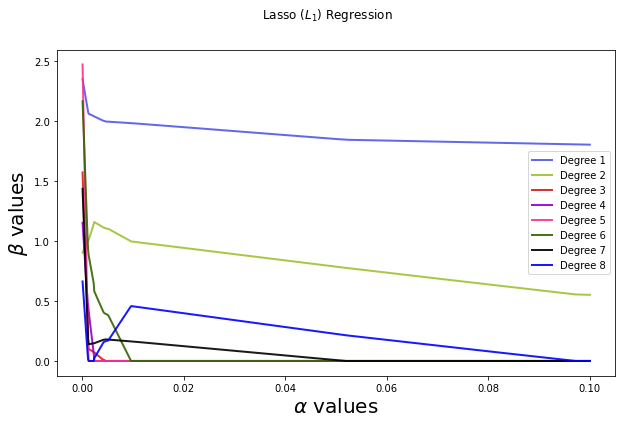

In [428]:
colors = ['#5059E8','#9FC131FF','#D91C1C','#9400D3','#FF2F92','#336600','black','blue']
fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    ax.plot(alpha_list, np.abs(lasso_trend[i+1]), color=colors[i], 
            alpha = 0.9, label = f'Degree {i+1}', lw=2)
    ax.legend(loc='best',fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)

fig.suptitle(r'Lasso ($L_1$) Regression');

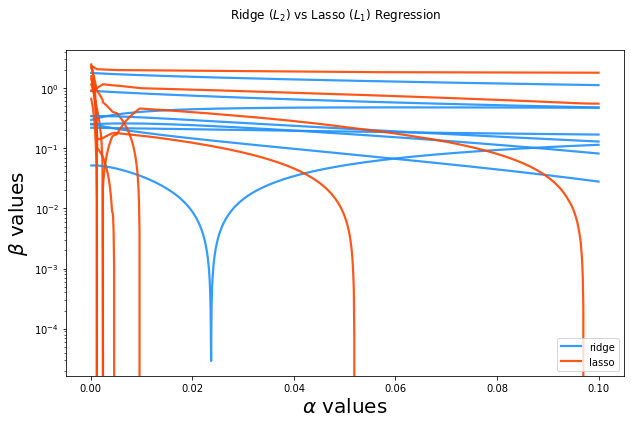

In [429]:
# Plot the variation of log-betas on vs the alpha value
# This plot makes it even more clear that ridge does not shrink coefs to 0.

# colors for the different methods.
colors = ['dodgerblue', 'orangered']
fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    if i == 0:
        labels = ["ridge", "lasso"]
    else:
        labels = [None, None]
    ax.semilogy(alpha_list, np.abs(ridge_trend[i+1]), color=colors[0],
                alpha = 0.9, lw=2.2, label = labels[0])
    ax.semilogy(alpha_list, np.abs(lasso_trend[i+1]), color=colors[1],
                alpha = 0.9, lw=2.2, label = labels[1])
    ax.legend(loc='best',fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)

fig.suptitle(r'Ridge ($L_2$) vs Lasso ($L_1$) Regression');